# Multiple Features Linear Regression

In [2]:
import copy
import numpy as np
import matplotlib.pyplot as plt

## Housing Price Prediction

Given a dataset containing three training examples with four features

| Size (sqft) | Number of Bedrooms  | Number of floors | Age of  Home | Price (1000s dollars)  |   
| ------------| ------------------- |----------------- |--------------|----------------------- |  
| 2104        | 5                   | 1                | 45           | 460                    |  
| 1416        | 3                   | 2                | 40           | 232                    |  
| 852         | 2                   | 1                | 35           | 178                    |  

Predict price for other houses

### Dataset

$$
\mathbf{X} = 
\begin{pmatrix}
x_0^{(0)}   & x_1^{(1)}     & \cdots    & x_{d-1}^{(0)}     \\
x_0^{(1)}   & x_1^{(1)}     & \cdots    & x_{d-1}^{(1)}     \\
            &               & \cdots    &                   \\
x_0^{(n-1)} & x_1^{(n-1)}   & \cdots    & x_{d-1}^{(n-1)}
\end{pmatrix}
$$

In [3]:
X_train = np.array([[2104, 5, 1, 45], [1416, 3, 2, 40], [852, 2, 1, 35]])
y_train = np.array([460, 232, 178])

In [4]:
n = X_train.shape[0]
print(f"Number of training examples: n =", n)
d = X_train.shape[1]
print(f"Number of features: d =", d)

Number of training examples: n = 3
Number of features: d = 4


In [5]:
b_init = 785.1811367994083
w_init = np.array([0.39133535, 18.75376741, -53.36032453, -26.42131618])

### Model function
$$ f_{w,b}(\mathbf{x}) = w_0x_0 + w_1x_1 + \cdots + w_{d-1}x_{d-1} + b $$

or

$$ f_{w,b}(\mathbf{x}) = \mathbf{w} \cdot \mathbf{x} + b $$

In [6]:
def predict(x, w, b):
    """ 
    Single predict using linear regression
    Args:
        x (ndarray(d,)) : an input variables with d features
        w (ndarray(d,)) : model parameters
        b (scalar)      : model parameter
    Returns:
        f (scalar)      : prediction
    """
    f = np.dot(w, x) + b
    return f

In [7]:
# ith input variable
i = 0
print(f"0th input variable: x^({i}) = {X_train[i, :]}")
print("prediction: f_w,b =", predict(X_train[i], w_init, b_init))


0th input variable: x^(0) = [2104    5    1   45]
prediction: f_w,b = 459.9999976194083


### Cost function

$$ J(w, b) = \frac{1}{2n} \sum_{i=0}^{n-1} (f_{w, b}(x^{(i)}) - y^{(i)})^2$$

where

$$ f_{w,b}(\mathbf{x^{(i)}}) = \mathbf{w} \cdot \mathbf{x^{(i)}} + b $$

In [8]:
def compute_cost(X, y, w, b):
    """ 
    Computes cost
    Args:
        X (ndarray(n, d))   : m input variables with d features
        y (ndarray(n,))     : target values
        w (ndarray(d,))     : model parameters
        b (scalar)          : model parameter
    Returns:
        cost (scalar)       : cost
    """
    n = X.shape[0]
    cost = 0.0

    for i in range(n):
        f = np.dot(w, X[i]) + b
        cost += (f - y[i]) ** 2
    
    cost /= 2 * n
    
    return cost

In [9]:
cost = compute_cost(X_train, y_train, w_init, b_init)
print('Cost =', cost)

Cost = 1.5578904428966628e-12


### Gradient descent


### Gradient descent

$$
\begin{align*}
\text{repeat util} &\text{ convergence:} \; \lbrace \\
\; w_j &:= w_j - \alpha \frac{\partial J(w, b)}{\partial w_j} \; \text{(for every }j)\\
\; b &:= b - \alpha \frac{\partial J(w, b)}{\partial b} \\
\rbrace
\end{align*}
$$

where

$$
\begin{align*}
\frac{\partial J(w, b)}{\partial w_j} &= \frac{1}{n} \sum_{i=0}^{n-1} (f_{w,b}(x^{(i)}) - y^{(i)})x_j^{(i)} \\
\frac{\partial J(w, b)}{\partial b} &= \frac{1}{n} \sum_{i=0}^{n-1} (f_{w,b}(x^{(i)}) - y^{(i)})
\end{align*}
$$

In [10]:
def compute_gradient(X, y, w, b):
    """ 
    Computes the gradient of the cost J wrt parameters w, b for linear regression
    Args:
        X (ndarray(n, d))   : n input variables with d features
        y (ndarray(n,))     : target values
        w (ndarray(d,))     : model parameters
        b (scalar)          : model parameter
    Returns:
        dJ_dw (ndarray(d,)) : gradient of J wrt w
        dJ_db (scalar)      : gradient of J wrt b
    """
    n, d = X.shape
    dJ_dw = np.zeros((d,))
    dJ_db = 0.0

    for i in range(n):
        err = (np.dot(w, X[i]) + b - y[i])

        for j in range(d):
            dJ_dw[j] += err * X[i, j]
        
        dJ_db += err

    dJ_dw /= n
    dJ_db /= n
    
    return dJ_dw, dJ_db

In [11]:
tmp_dJ_dw, tmp_dJ_db = compute_gradient(X_train, y_train, w_init, b_init)
print('dJ_dw at initial w, b:', tmp_dJ_dw)
print('dJ_db at initial w, b:', tmp_dJ_db)

dJ_dw at initial w, b: [-2.72623577e-03 -6.27197263e-06 -2.21745578e-06 -6.92403391e-05]
dJ_db at initial w, b: -1.6739251501955248e-06


In [12]:
def gradient_descent(X, y, w_in, b_in, alpha, num_iters):
    """ 
    Performs gradient descent to fit w, b. Updates w, b by taking num_iters 
    gradient steps with learning rate alpha
    Args:
        x (ndarray(n,))     : input variables, n examples
        y (ndarray(n,))     : target values
        w_in, b_in (scalar) : intial values of model parameters
        alpha (float)       : learning rate
        num_iters (int)     : number of iterations to run gradient descent
    Returns:
        w, b (scalar)       : updated value of model parameters after running 
                            gradient descent
        J_hist (list)       : history of cost values
    """
    J_hist = []
    w = copy.deepcopy(w_in)
    b = b_in

    for i in range(num_iters):
        dJ_dw, dJ_db = compute_gradient(X, y, w, b)

        w -= alpha * dJ_dw
        b -= alpha * dJ_db

        J_hist.append(compute_cost(X, y, w, b))

        if i % (num_iters / 10) == 0:
            print(f"Iteration {i:4d}: Cost {J_hist[-1]:8.2f}")
            
    return w, b, J_hist

In [13]:
initial_w = np.zeros_like(w_init)
initial_b = 0.0
iterations = 1000
alpha = 5.0e-7

w_final, b_final, J_history = gradient_descent(X_train, y_train, initial_w, initial_b, alpha, iterations)
print(f"b, w found by gradient descent: {b_final:0.2f}, {w_final} ")

n = X_train.shape[0]
for i in range(n):
    print(f"prediction: {np.dot(X_train[i], w_final) + b_final:0.2f}, target value: {y_train[i]}")


Iteration    0: Cost  2529.46
Iteration  100: Cost   695.99
Iteration  200: Cost   694.92
Iteration  300: Cost   693.86
Iteration  400: Cost   692.81
Iteration  500: Cost   691.77
Iteration  600: Cost   690.73
Iteration  700: Cost   689.71
Iteration  800: Cost   688.70
Iteration  900: Cost   687.69
b, w found by gradient descent: -0.00, [ 0.20396569  0.00374919 -0.0112487  -0.0658614 ] 
prediction: 426.19, target value: 460
prediction: 286.17, target value: 232
prediction: 171.47, target value: 178


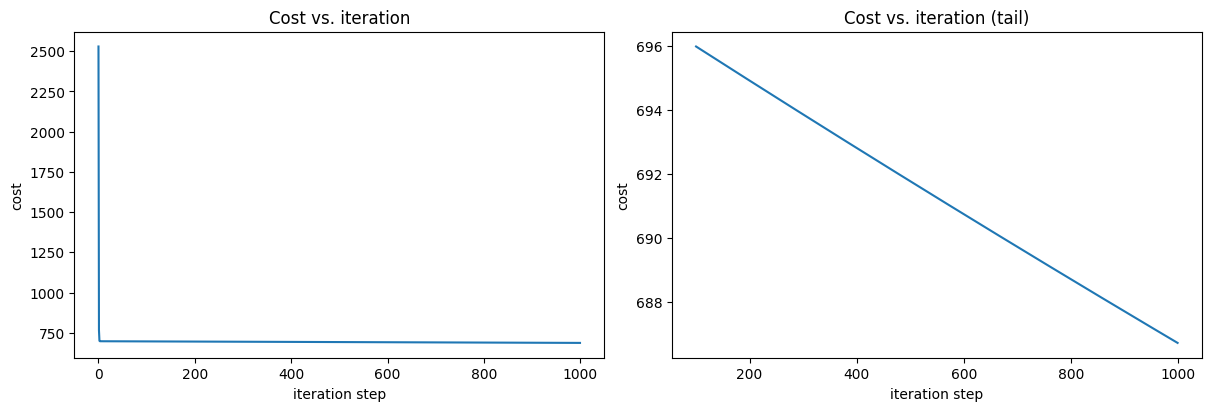

In [14]:
# Plot cost versus iteration
fig, (ax1, ax2) = plt.subplots(1, 2, constrained_layout=True, figsize=(12, 4))

ax1.plot(J_history)
ax2.plot(100 + np.arange(len(J_history[100:])), J_history[100:])

ax1.set_title('Cost vs. iteration');        ax2.set_title('Cost vs. iteration (tail)')
ax1.set_xlabel('iteration step');           ax2.set_xlabel('iteration step')
ax1.set_ylabel('cost');                     ax2.set_ylabel('cost')

plt.show()